In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# load file approach 1
fileName = 'data_00.csv'
df1 = pd.read_csv(fileName)

In [3]:
# load file approach 2
fileName = 'data_00.csv'
df = pd.read_csv(fileName, index_col='datetime')



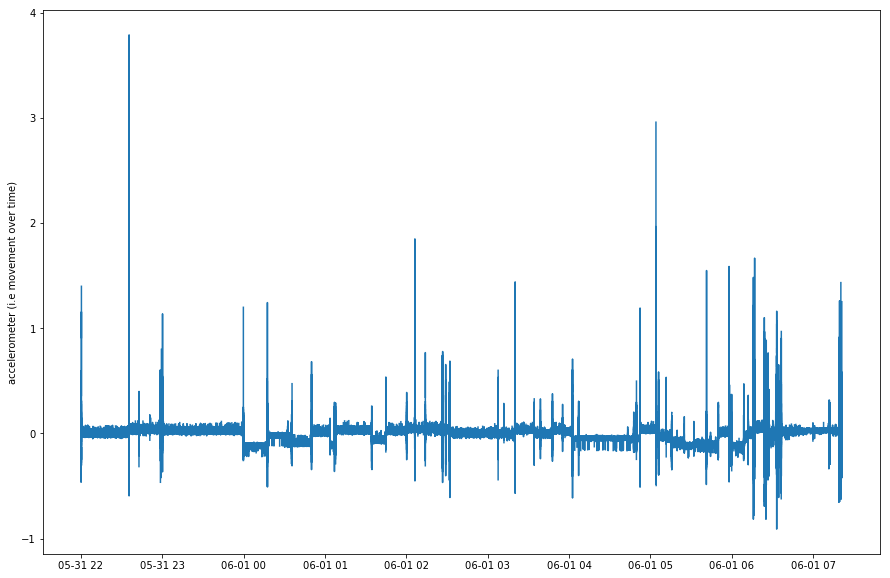

In [4]:

magnitude = df['wearable-mag-xl1']
datetime = pd.to_datetime(df.index)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_ylabel('accelerometer (i.e movement over time)')
ax.plot(datetime, magnitude)

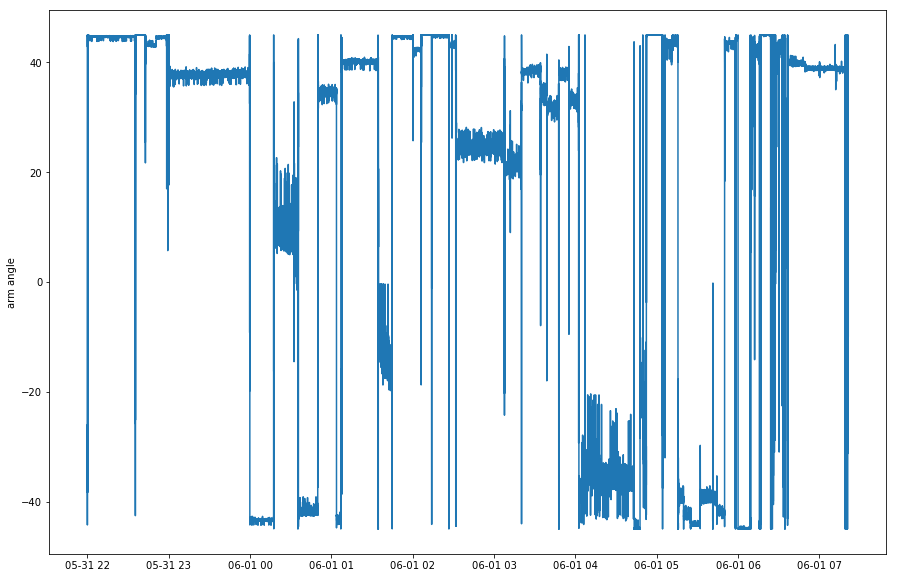

In [5]:
# classifying sleep arm angle

accelerometer_directions = df[['wearable-xl1-x', 'wearable-xl1-y', 'wearable-xl1-z']]

# get rid of rows with missing values
accelerometer_directions = accelerometer_directions.dropna()
datetime = pd.to_datetime(accelerometer_directions.index)

# arm angle calculation using accelerometer data
accelerometer_directions['angle'] = 180/np.pi * np.arctan(accelerometer_directions['wearable-xl1-z'] / np.sqrt( np.square(accelerometer_directions['wearable-xl1-x']) + np.square(accelerometer_directions['wearable-xl1-z']) ))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_ylabel('arm angle')
ax.plot(datetime, accelerometer_directions['angle'])

model for arm angle:  $$ \theta_{\text{arm}} = tan^{-1} \bigg(\frac{ a_{z} }{ \sqrt{a_{x}^{2} + a_{y}^{2}} } \bigg) $$

In [42]:
# calculate the average for every 5 minues for the "arm angle"

# convert index to DatetimeIndex
accelerometer_directions.index = pd.DatetimeIndex(accelerometer_directions.index)

# average values within 5 min intervals

print(accelerometer_directions)
resample_5min_accel = accelerometer_directions.resample('5Min')#.min()


# fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(111)
# ax.set_title('Arm angle with 5 min resampling')
# ax.set_ylabel('arm angle')
# ax.plot(resample_5min_accel.index, resample_5min_accel['angle'])

                            wearable-xl1-x  wearable-xl1-y  wearable-xl1-z  \
datetime                                                                     
2016-05-31 21:59:59.919856          -0.648           0.238          -0.652   
2016-05-31 21:59:59.969904          -0.574           0.472          -0.500   
2016-05-31 22:00:00.019952          -0.690           0.338          -0.492   
2016-05-31 22:00:00.070000          -0.658           0.396          -0.504   
2016-05-31 22:00:00.119856          -0.656           0.328          -0.442   
2016-05-31 22:00:00.169904          -0.672           0.608          -0.386   
2016-05-31 22:00:00.219952          -0.648           0.318          -0.480   
2016-05-31 22:00:00.270000          -0.752           0.214          -0.762   
2016-05-31 22:00:00.319856          -0.680           0.358          -0.640   
2016-05-31 22:00:00.369904          -0.746           0.582          -0.962   
2016-05-31 22:00:00.419952          -0.832           0.316      

In [7]:
resample_5min_accel['angle'].min()


datetime
2016-05-31 21:59:00   -35.347283
2016-05-31 22:00:00   -44.242768
2016-05-31 22:01:00    44.579936
2016-05-31 22:02:00    43.940505
2016-05-31 22:03:00    43.811936
2016-05-31 22:04:00    44.607551
2016-05-31 22:05:00    44.605237
2016-05-31 22:06:00    44.579936
2016-05-31 22:07:00    43.814783
2016-05-31 22:08:00    43.829886
2016-05-31 22:09:00    44.027609
2016-05-31 22:10:00    43.974609
2016-05-31 22:11:00    43.939399
2016-05-31 22:12:00    44.607551
2016-05-31 22:13:00    44.493312
2016-05-31 22:14:00    44.474832
2016-05-31 22:15:00    44.468449
2016-05-31 22:16:00    43.952020
2016-05-31 22:17:00    43.882945
2016-05-31 22:18:00    43.863017
2016-05-31 22:19:00    43.787842
2016-05-31 22:20:00    44.465213
2016-05-31 22:21:00    43.855867
2016-05-31 22:22:00    43.962251
2016-05-31 22:23:00    44.455329
2016-05-31 22:24:00    44.474832
2016-05-31 22:25:00    43.802101
2016-05-31 22:26:00    43.893036
2016-05-31 22:27:00    43.856307
2016-05-31 22:28:00    43.882945
 

/Users/Andrew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/Andrew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
/Users/Andrew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
/Users/Andrew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: 
.resample() is now a deferred operation
You called ind

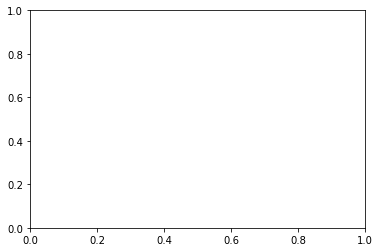

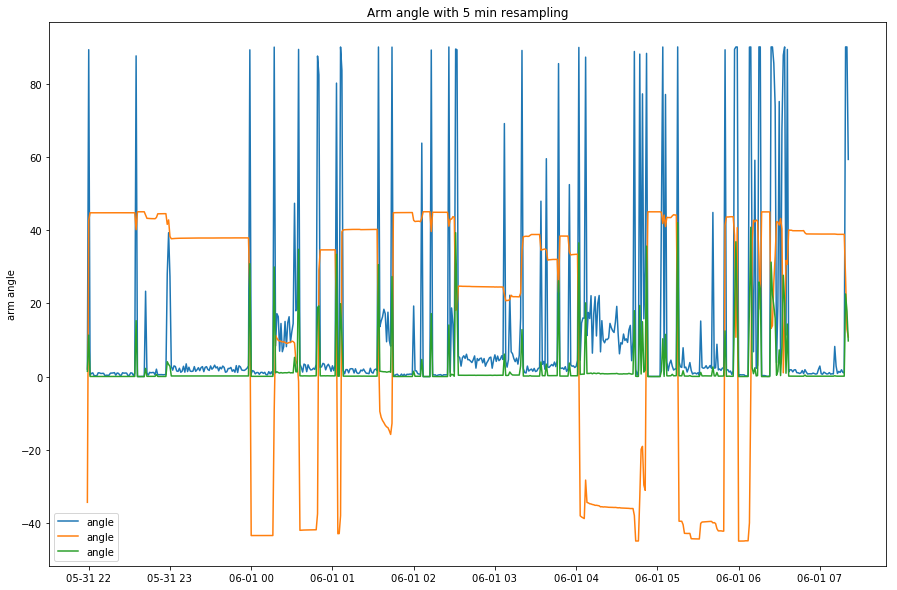

In [32]:
a = resample_5min_accel['angle'].max()-resample_5min_accel['angle'].min()
b = resample_5min_accel.mean()

plt.hold()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('Arm angle with 5 min resampling')
ax.set_ylabel('arm angle')
ax.plot(resample_5min_accel.index, a)
ax.plot(resample_5min_accel.index, b['angle'])
ax.plot(resample_5min_accel.index, accelerometer_directions.resample('1Min').std()['angle'])

plt.legend()

/Users/Andrew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead


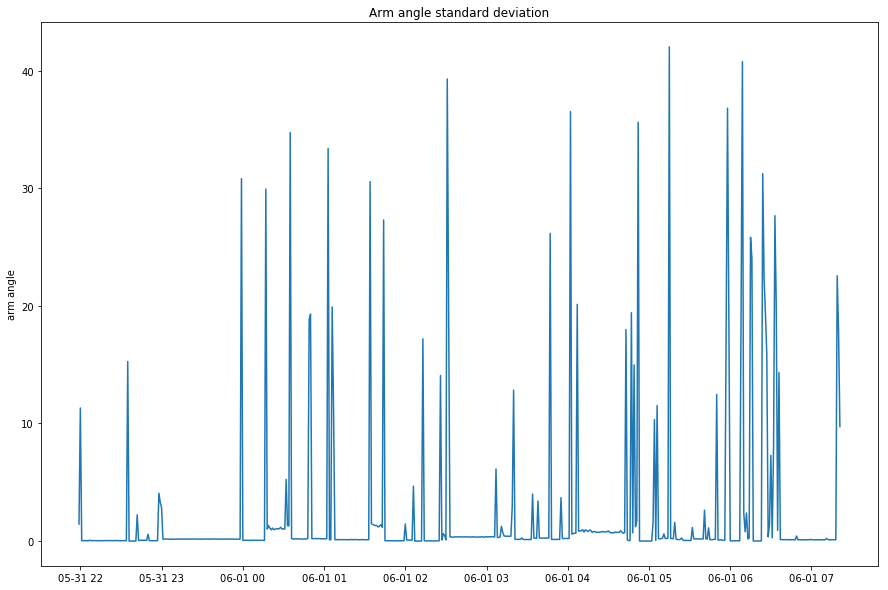

In [39]:
accelerometer_directions.resample('5Min').std()['angle']

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('Arm angle standard deviation')
ax.set_ylabel('arm angle')
ax.plot(resample_5min_accel.index, accelerometer_directions.resample('1Min').std()['angle'])


/Users/Andrew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead


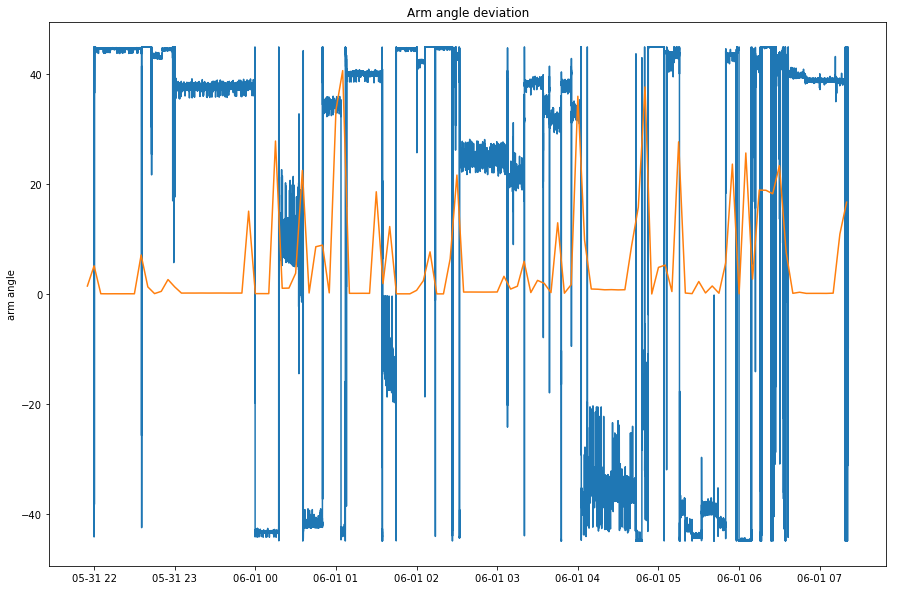

In [44]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('Arm angle deviation')
ax.set_ylabel('arm angle')
ax.plot(datetime, accelerometer_directions['angle'])
ax.plot(resample_5min_accel.index, accelerometer_directions.resample('5Min').std()['angle'])


In [55]:
std_5min = accelerometer_directions.resample('5Min').std()['angle']
total_sleep_interval = std_5min.count()
sleep_over_std5 = std_5min[std_5min>5].count()


print("sleep_over_std5/total_sleep_interval * 100

28.947368421052634

In [41]:
a = accelerometer_directions.resample('5Min').std()['angle']
print(a.mean())

5.436828288530231


### using this resampled data what can I do to detect sleep


* over 5 min 5angle
* work out the angle deviation
* frequency
* and max moved